# Line plots

In [1]:
from plotnine import (
    ggplot,
    aes,
    geom_line,
    facet_wrap,
    labs,
    scale_x_datetime,
    element_text,
    theme_538
)
from plotnine.data import meat

`geom_line()` connects the dots, and is useful for time series data.

In [2]:
meat.head()

Make it tidy.

In [3]:
meat_long = meat.melt(
    id_vars="date",
    value_vars=["beef", "veal", "pork", "lamb_and_mutton", "broilers", "turkey"],
    var_name="animal",
    value_name="weight"
).dropna()

meat_long.head()

First try

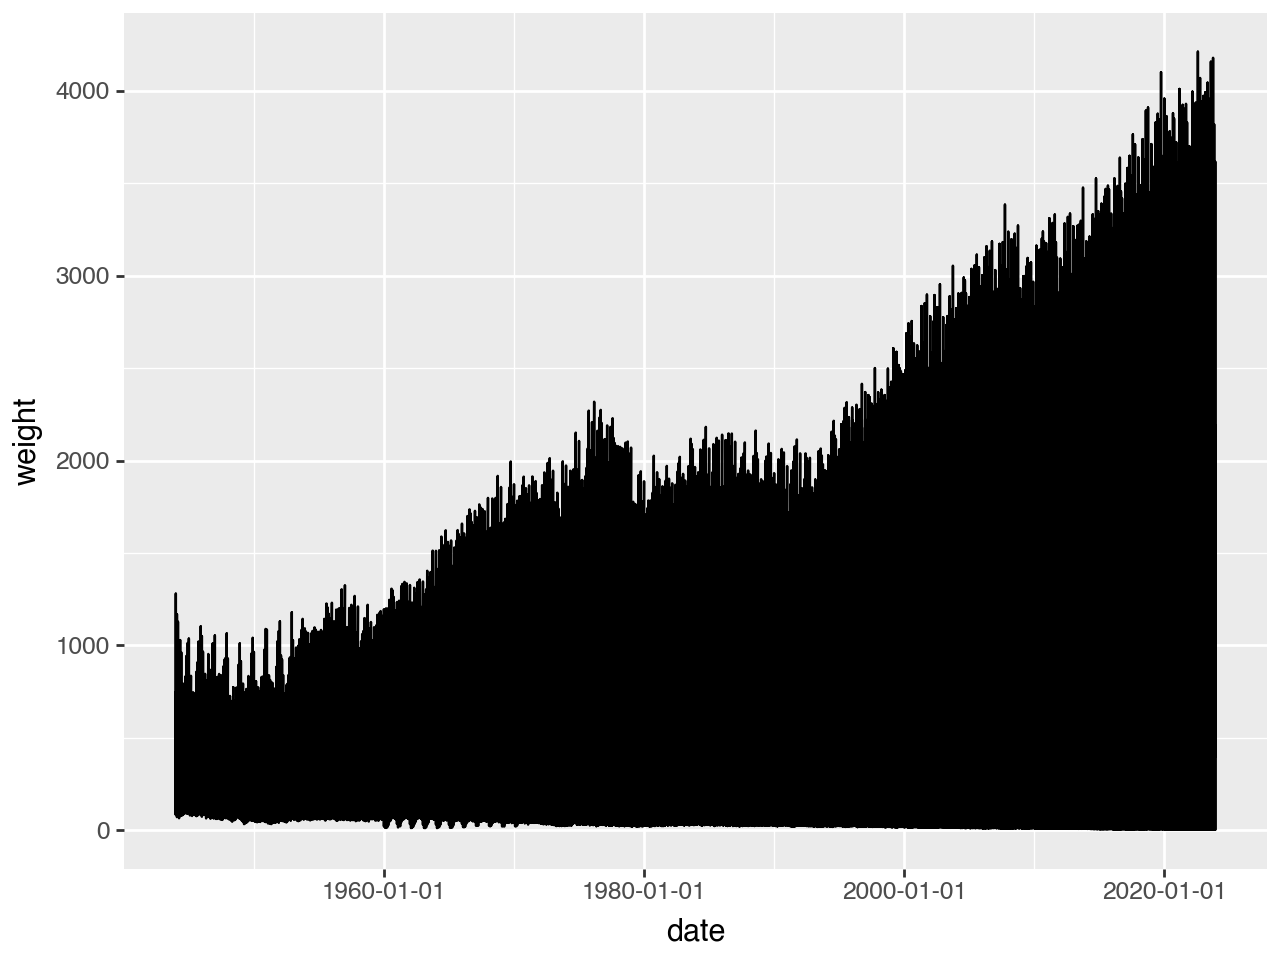

In [4]:
p = (
    ggplot(meat_long, aes(x="date", y="weight"))
    + geom_line()
)
p

It looks crowded because each there is more than one monthly entry at
each x-point. We can get a single trend line by getting a monthly
aggregate of the weights.

In [5]:
meat_long_monthly_agg = meat_long.groupby("date").agg({"weight": "sum"}).reset_index()
meat_long_monthly_agg

960 rows × 2 columns

### A Single Trend Line

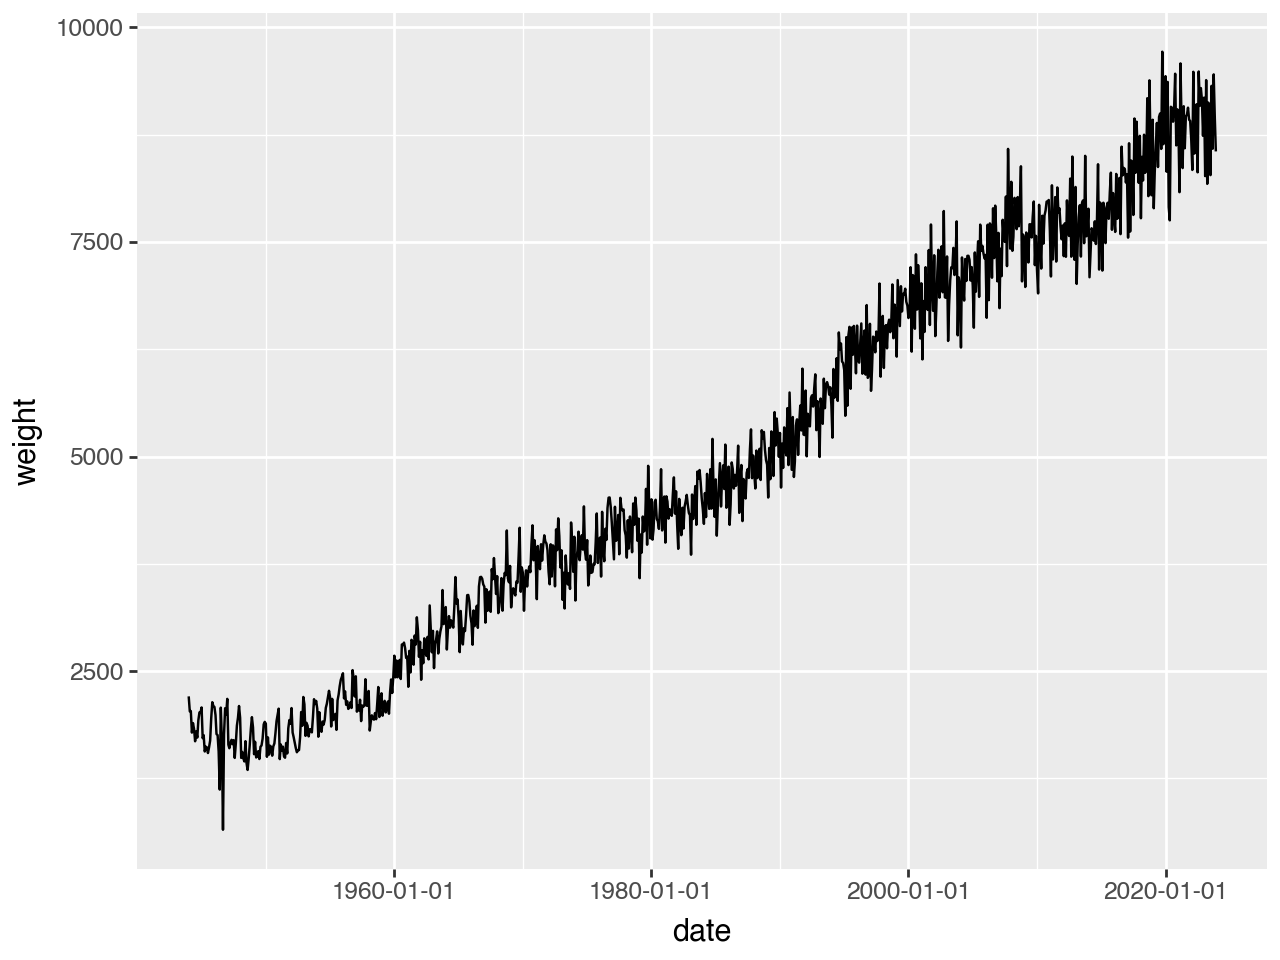

In [6]:
(
    ggplot(meat_long_monthly_agg, aes(x="date", y="weight"))
    + geom_line()
)

Add some style

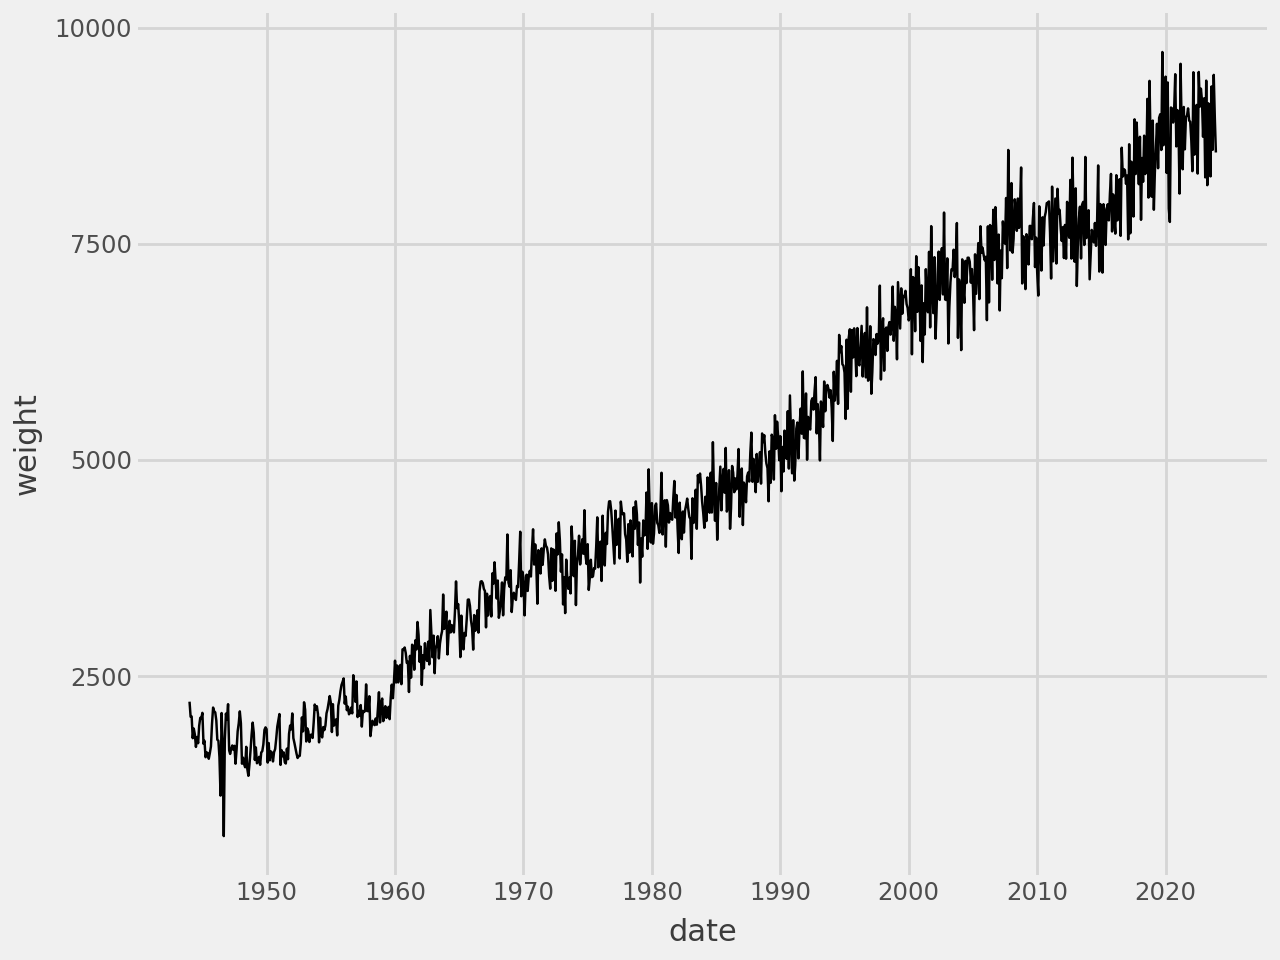

In [7]:
# Gallery, lines
(
    ggplot(meat_long_monthly_agg, aes(x="date", y="weight"))
    + geom_line()
    # Styling
    + scale_x_datetime(date_breaks="10 years", date_labels="%Y")
    + theme_538()
)

Or we can group by the animals to get a trend line for each animal

### Multiple Trend Lines

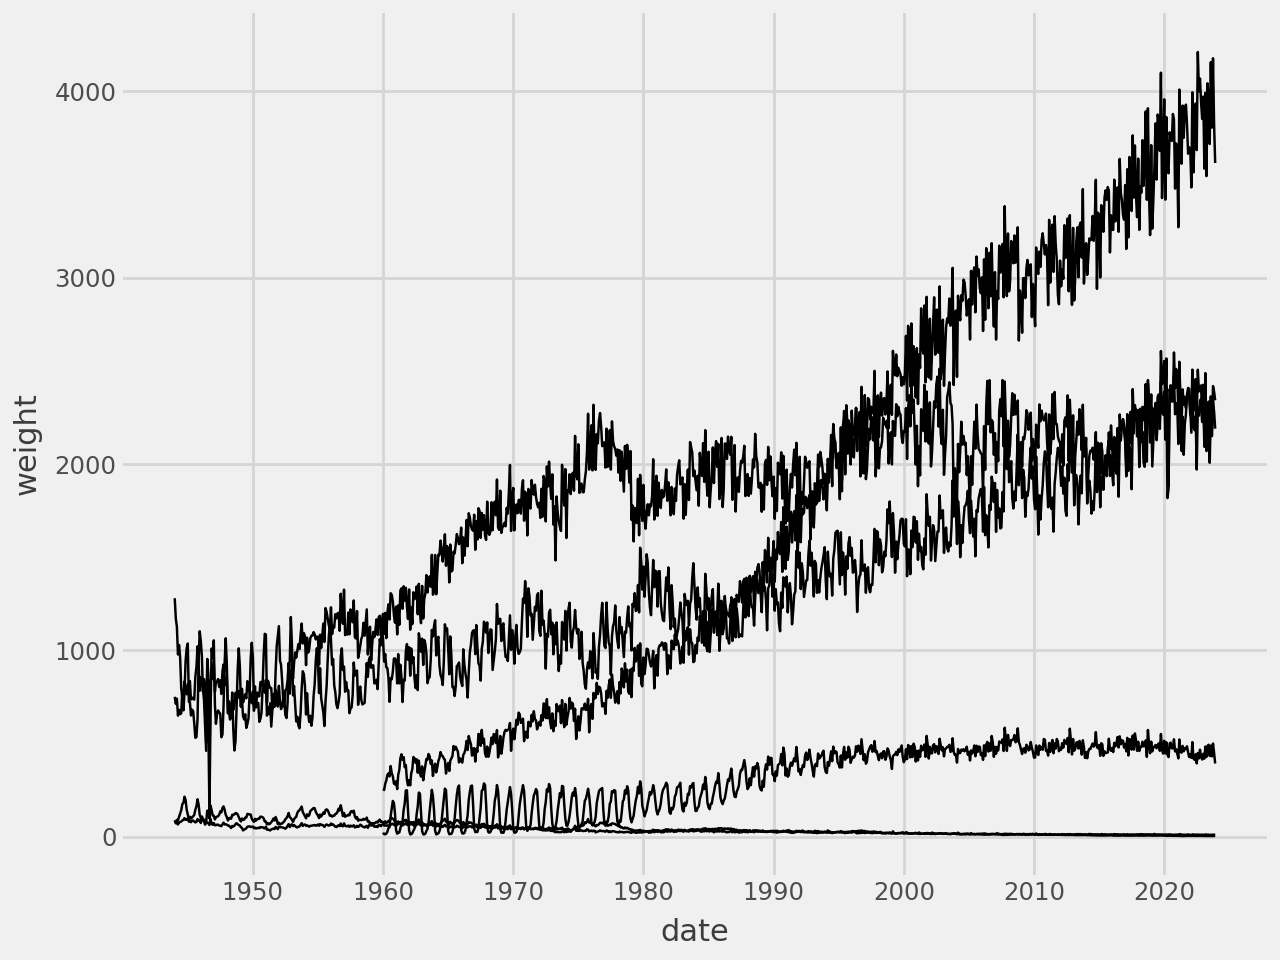

In [8]:
(
    ggplot(meat_long, aes(x="date", y="weight", group="animal"))
    + geom_line()
    # Styling
    + scale_x_datetime(date_breaks="10 years", date_labels="%Y")
    + theme_538()
)

Make each group be a different color.

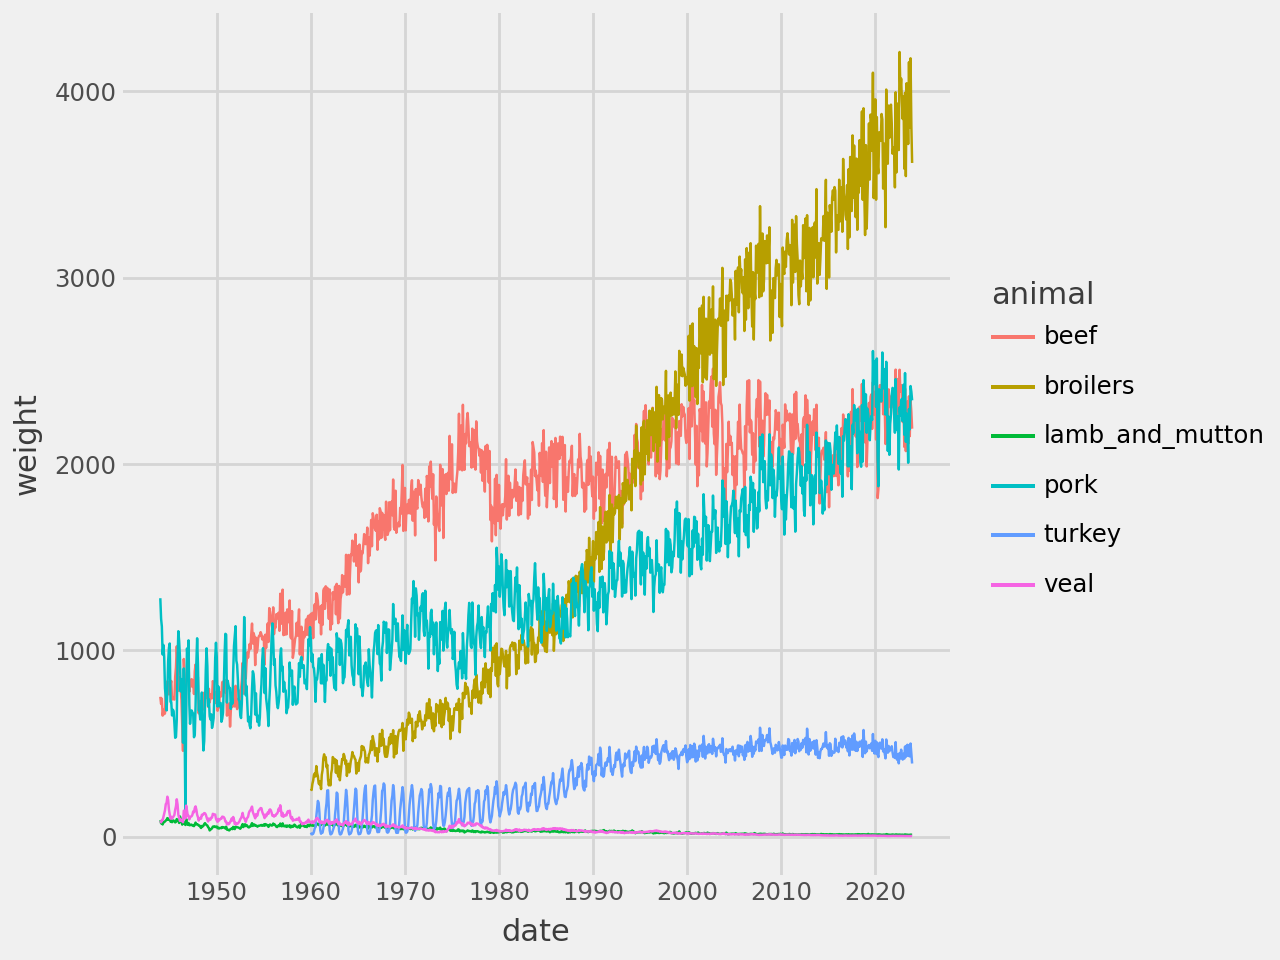

In [9]:
# Gallery, lines
(
    ggplot(meat_long, aes(x="date", y="weight", color="animal"))
    + geom_line()
    # Styling
    + scale_x_datetime(date_breaks="10 years", date_labels="%Y")
    + theme_538()
)

### A Trend Line Per Facet

Plot each group on a separate panel. The legend is no longer required
and we adjust to the smaller panels by reducing the `size` of the line,
`size` of the text and the number of grid lines.

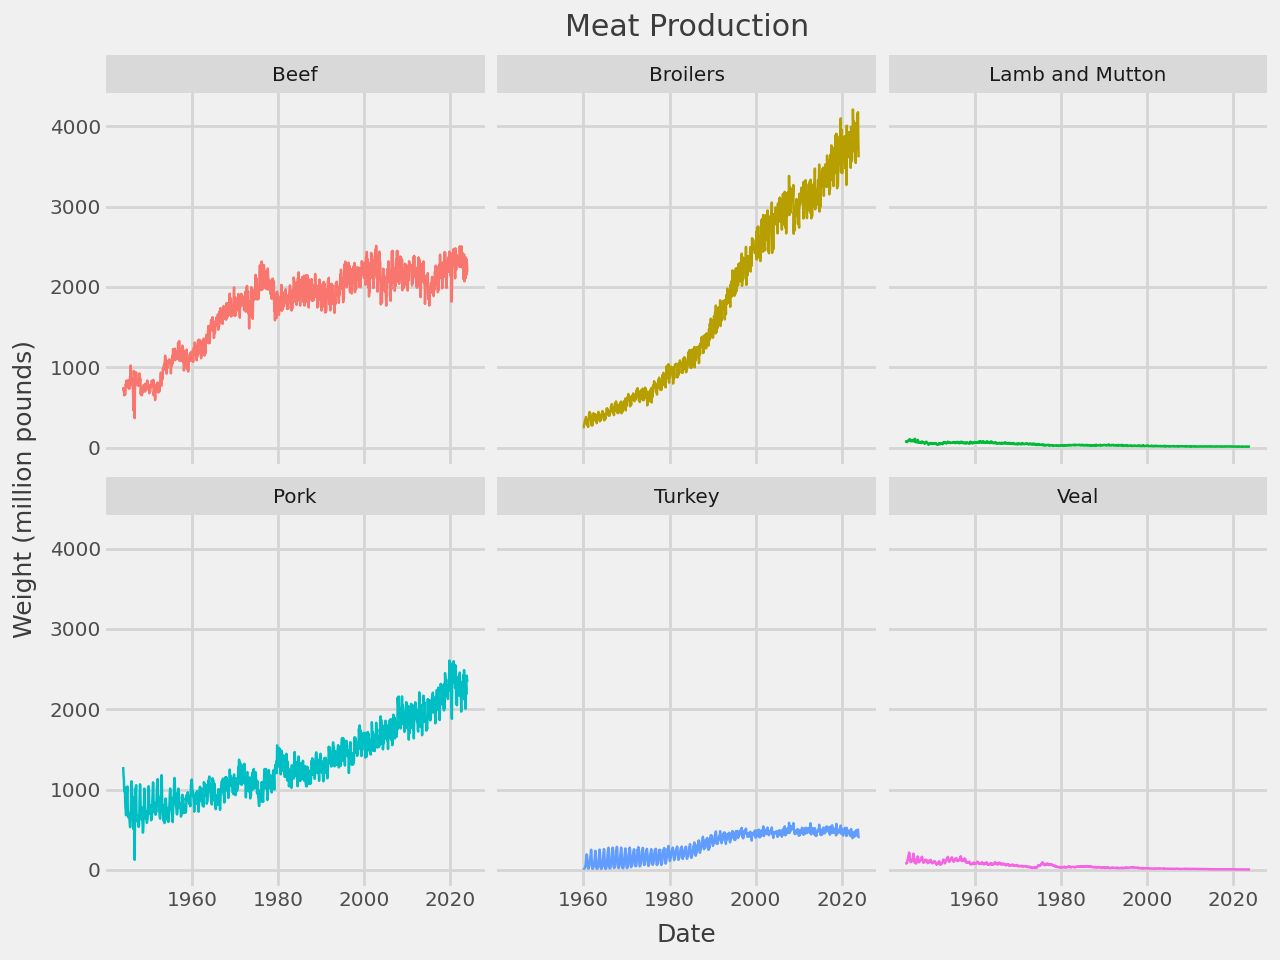

In [10]:
# Gallery, lines
def titled(strip_title):
    return " ".join(s.title() if s != "and" else s for s in strip_title.split("_"))

(
    ggplot(meat_long, aes("date", "weight", color="animal"))
    + geom_line(size=.5, show_legend=False)
    + facet_wrap("animal", labeller=titled)
    + scale_x_datetime(date_breaks="20 years", date_labels="%Y")
    + labs(
        x="Date",
        y="Weight (million pounds)",
        title="Meat Production"
    )
    + theme_538(base_size=9)
)